# 图像特效-鱼眼效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [13]:
def fish_eye(src,curvature,inversed=False,leave=True):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    midX = cols // 2
    midY = rows // 2
    R = min(midX,midY)
    w = 0.001 * curvature
    s = R / np.log(w * R + 1)
    for y in range(rows):
        for x in range(cols):
            offsetY = y - midY
            offsetX = x - midX
            radian = math.atan2(offsetY,offsetX)
            radius = np.sqrt(offsetX ** 2 + offsetY ** 2)
            if radius <= R:
                if not inversed:
                    radius = (np.exp(radius / s) - 1) / w
                else:
                    radian = s * log(1 + w * radius)
                nx = int(radius * np.cos(radian) + midX)
                ny = int(radius * np.sin(radian) + midY)
                nx = max(0,min(cols - 1,nx))
                ny = max(0,min(rows - 1,ny))
                
                dst[y,x] = src[ny,nx]
            else:
                if leave:
                    dst[y,x] = src[y,x]
    dst = np.clip(dst,0,255)
    return np.uint8(dst)
                

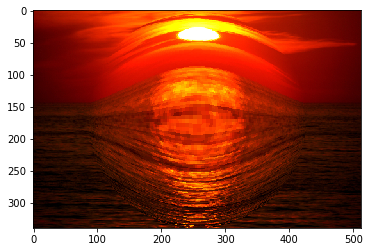

In [17]:
dst = fish_eye(rgb,150,leave=True)
plt.imshow(dst)